In [1]:
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np




In [2]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, HoverTool, PanTool, WheelZoomTool, ResetTool
from bokeh.models.graphs import from_networkx
from bokeh.plotting import figure
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet


In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
#reading from excel
data = pd.read_excel (r'C:\Users\alex7\Documents\NetworkRappers.xlsx')
#print(data.head())
print(data.iloc[0: 189,:])




          Artist                  Artist2
0         Eminem               DJ Premier
1         Eminem                  Dr. Dre
2         Eminem                Young M.A
3         Eminem             Royce Da 5'9
4         Eminem               Juice Wrld
5         Eminem              Don Toliver
6         Eminem             Joyner Lucas
7         Eminem           Kendrick Lamar
8         Eminem                Lil Wayne
9         Eminem                  50 Cent
10        Eminem               Obie Trice
11        Eminem               Snoop Dogg
12        Eminem                 Kid Cudi
13        Eminem                    Logic
14         Drake              Chris Brown
15         Drake                   Future
16         Drake               Young Thug
17         Drake            Playboi Carti
18         Drake                  J. Cole
19         Drake                Rick Ross
20         Drake                    Jay-Z
21         Drake             Travis Scott
22         Drake               Kan

<class 'networkx.classes.graph.Graph'>


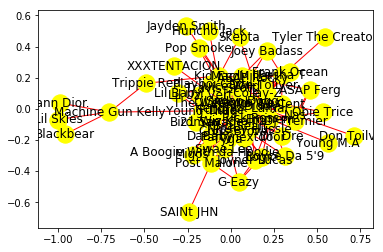

In [6]:
#make a network from the edgelist above
G = networkx.from_pandas_edgelist(data, 'Artist', 'Artist2')
print(type(G))
networkx.draw_networkx(G, node_color = 'yellow', edge_color = 'red' )



In [7]:
#Choose a title!
title = 'Rap network'

#Establish which categories will appear when hovering over each node

hover_tool = HoverTool(tooltips =  [("Artist", "@index")])



In [8]:
#Create a plot — set dimensions, toolbar, and title
plot = figure(tools = "pan,wheel_zoom,save,reset", 
              active_scroll='wheel_zoom',
              x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), 
              title=title)



plot.add_tools(hover_tool)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [9]:
# network with nodes sized by Degree
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [10]:
#dictionnary with keys = node name, value = degree
degrees = dict(networkx.degree(G))


networkx.set_node_attributes(G, name='degree', values=degrees)


print(G.nodes['Drake'])
     


{'degree': 16}


In [11]:
print(degrees)
print(len(degrees))

{'Eminem': 15, 'DJ Premier': 4, 'Dr. Dre': 3, 'Young M.A': 1, "Royce Da 5'9": 2, 'Juice Wrld': 3, 'Don Toliver': 3, 'Joyner Lucas': 5, 'Kendrick Lamar': 16, 'Lil Wayne': 16, '50 Cent': 6, 'Obie Trice': 2, 'Snoop Dogg': 11, 'Kid Cudi': 14, 'Logic': 5, 'Drake': 16, 'Chris Brown': 8, 'Future': 18, 'Young Thug': 17, 'Playboi Carti': 8, 'J. Cole': 9, 'Rick Ross': 18, 'Jay-Z': 7, 'Travis Scott': 18, 'Kanye West': 17, 'Partynextdoor': 6, 'Big Sean': 22, 'The Weeknd': 7, 'Birdman': 4, 'Pusha T': 7, 'Frank Ocean': 3, 'Nas': 6, 'DaBaby': 5, 'Lil Baby': 3, 'Pop Smoke': 2, 'Huncho Jack': 1, 'Lil Uzi Vert': 8, 'ASAP Rocky': 10, 'Skepta': 2, 'ASAP Ferg': 3, '21 Savage': 11, 'Swae Lee': 6, 'Post Malone': 7, 'Migos': 3, 'Trippie Red': 2, 'Jayden Smith': 1, 'Machine Gun Kelly': 5, 'Tyga': 11, 'Blackbear': 1, 'Iann Dior': 1, 'Lil Skies': 1, 'Wiz Khalifa': 12, 'Mac Miller': 5, 'G-Eazy': 4, 'A Boogie With da Hoodie': 3, 'XXXTENTACION': 1, 'Tyler The Creator': 1, 'Diddy': 7, 'Don Toilver': 1, 'SAINt JHN': 

In [12]:
# adjust the size of the degree linear such that small degree is still visible on plot (decided not to use it so set it to 0.)

number_to_adjust_by = 0
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])

networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)





In [13]:
#prepare for interactive modus,chose what appears in the box. 
hover_tool = HoverTool(tooltips =  [("artist", "@index"), ('Degree', '@degree')])

In [14]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

#Choose a title!
title = 'Rap networlk'


#Create a plot — set dimensions, toolbar, and title
plot = figure(tools="pan,wheel_zoom,save,reset", 
              active_scroll='wheel_zoom',
              x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#add hover tool to plot, 
plot.add_tools(hover_tool)
#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#add attributes 
network_graph.node_renderer.data_source.data['degree'] = list(adjusted_node_size.values())
network_graph.node_renderer.data_source.data['colors'] = list(adjusted_node_size.values())


min_color = min(list(adjusted_node_size.values()))
max_color = max(list(adjusted_node_size.values()))



#Set node sizes and colors according to node degree (color as spectrum of color palette)

network_graph.node_renderer.glyph = Circle(size = 'degree', 
                                           fill_color=linear_cmap('colors', 'Blues8', min_color, max_color))

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [22]:
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='16px', background_fill_alpha=.1)
plot.renderers.append(labels)
show(plot)

In [16]:
N, K = G.order(), G.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)

print(degrees)


Nodes:  62
Edges:  212
{'Eminem': 15, 'DJ Premier': 4, 'Dr. Dre': 3, 'Young M.A': 1, "Royce Da 5'9": 2, 'Juice Wrld': 3, 'Don Toliver': 3, 'Joyner Lucas': 5, 'Kendrick Lamar': 16, 'Lil Wayne': 16, '50 Cent': 6, 'Obie Trice': 2, 'Snoop Dogg': 11, 'Kid Cudi': 14, 'Logic': 5, 'Drake': 16, 'Chris Brown': 8, 'Future': 18, 'Young Thug': 17, 'Playboi Carti': 8, 'J. Cole': 9, 'Rick Ross': 18, 'Jay-Z': 7, 'Travis Scott': 18, 'Kanye West': 17, 'Partynextdoor': 6, 'Big Sean': 22, 'The Weeknd': 7, 'Birdman': 4, 'Pusha T': 7, 'Frank Ocean': 3, 'Nas': 6, 'DaBaby': 5, 'Lil Baby': 3, 'Pop Smoke': 2, 'Huncho Jack': 1, 'Lil Uzi Vert': 8, 'ASAP Rocky': 10, 'Skepta': 2, 'ASAP Ferg': 3, '21 Savage': 11, 'Swae Lee': 6, 'Post Malone': 7, 'Migos': 3, 'Trippie Red': 2, 'Jayden Smith': 1, 'Machine Gun Kelly': 5, 'Tyga': 11, 'Blackbear': 1, 'Iann Dior': 1, 'Lil Skies': 1, 'Wiz Khalifa': 12, 'Mac Miller': 5, 'G-Eazy': 4, 'A Boogie With da Hoodie': 3, 'XXXTENTACION': 1, 'Tyler The Creator': 1, 'Diddy': 7, 'Don Toi

In [16]:
degrees= ([15, 4, 3, 1, 2, 3, 3, 5, 16, 16, 6, 2, 11, 14, 5, 16, 8, 18, 17, 8, 9, 18, 7, 18, 17, 6, 22, 7, 4, 7, 3, 6, 5, 3, 2, 1, 8, 10, 2, 3, 11, 6, 7, 3, 2, 1, 5, 11, 1, 1, 1, 12, 5, 4, 3, 1, 1, 7, 1, 1, 6, 3 ])
print(np.var(degrees))

30.844953173777313


In [18]:
centrality = networkx.eigenvector_centrality_numpy(G)
print([f"{node} {centrality[node]:0.2f}" for node in centrality])

['Eminem 0.14', 'DJ Premier 0.05', 'Dr. Dre 0.05', 'Young M.A 0.01', "Royce Da 5'9 0.04", 'Juice Wrld 0.06', 'Don Toliver 0.05', 'Joyner Lucas 0.05', 'Kendrick Lamar 0.24', 'Lil Wayne 0.25', '50 Cent 0.06', 'Obie Trice 0.02', 'Snoop Dogg 0.17', 'Kid Cudi 0.17', 'Logic 0.06', 'Drake 0.27', 'Chris Brown 0.14', 'Future 0.26', 'Young Thug 0.24', 'Playboi Carti 0.15', 'J. Cole 0.14', 'Rick Ross 0.21', 'Jay-Z 0.12', 'Travis Scott 0.26', 'Kanye West 0.23', 'Partynextdoor 0.13', 'Big Sean 0.31', 'The Weeknd 0.14', 'Birdman 0.09', 'Pusha T 0.07', 'Frank Ocean 0.04', 'Nas 0.08', 'DaBaby 0.05', 'Lil Baby 0.07', 'Pop Smoke 0.04', 'Huncho Jack 0.02', 'Lil Uzi Vert 0.15', 'ASAP Rocky 0.12', 'Skepta 0.03', 'ASAP Ferg 0.02', '21 Savage 0.19', 'Swae Lee 0.10', 'Post Malone 0.08', 'Migos 0.05', 'Trippie Red 0.02', 'Jayden Smith 0.01', 'Machine Gun Kelly 0.02', 'Tyga 0.16', 'Blackbear 0.00', 'Iann Dior 0.00', 'Lil Skies 0.00', 'Wiz Khalifa 0.18', 'Mac Miller 0.09', 'G-Eazy 0.03', 'A Boogie With da Hoodie

In [23]:
import operator


d = {
print('Original dictionary : ',d)
sorted_d = sorted(d.items(), key=operator.itemgetter(1))

sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : ',sorted_d)

Original dictionary :  {'Eminem': 0.10986208838306237, 'DJ Premier': 0.008180879756337809, 'Dr. Dre': 0.0005991412958626074, 'Young M.A': 0.0, "Royce Da 5'9": 0.0, 'Juice Wrld': 0.0028789954464978574, 'Don Toliver': 0.0014355675397141163, 'Joyner Lucas': 0.00669837600165469, 'Kendrick Lamar': 0.0517875287860823, 'Lil Wayne': 0.06286885442140988, '50 Cent': 0.01581801386056973, 'Obie Trice': 0.0, 'Snoop Dogg': 0.02598005435525876, 'Kid Cudi': 0.1025800434698699, 'Logic': 0.00625443166426773, 'Drake': 0.025689392393912127, 'Chris Brown': 0.013847688659688164, 'Future': 0.05635353940203843, 'Young Thug': 0.14782989588896053, 'Playboi Carti': 0.007238994663138307, 'J. Cole': 0.034940079650867456, 'Rick Ross': 0.08365416632920093, 'Jay-Z': 0.006672636713620319, 'Travis Scott': 0.09055236559343306, 'Kanye West': 0.08778066479947949, 'Partynextdoor': 0.0012132463771808034, 'Big Sean': 0.15611817964892266, 'The Weeknd': 0.00231738662066531, 'Birdman': 0.001670021600150316, 'Pusha T': 0.0471868

In [15]:
print("density: %s" % networkx.density(G))



density: 0.1121099947117927


In [16]:
print(networkx.average_shortest_path_length(G))

2.4881015335801164


In [17]:
b=networkx.betweenness_centrality(G)
print(b)



{'Eminem': 0.10986208838306237, 'DJ Premier': 0.008180879756337809, 'Dr. Dre': 0.0005991412958626074, 'Young M.A': 0.0, "Royce Da 5'9": 0.0, 'Juice Wrld': 0.0028789954464978574, 'Don Toliver': 0.0014355675397141163, 'Joyner Lucas': 0.00669837600165469, 'Kendrick Lamar': 0.0517875287860823, 'Lil Wayne': 0.06286885442140988, '50 Cent': 0.01581801386056973, 'Obie Trice': 0.0, 'Snoop Dogg': 0.02598005435525876, 'Kid Cudi': 0.1025800434698699, 'Logic': 0.00625443166426773, 'Drake': 0.025689392393912127, 'Chris Brown': 0.013847688659688164, 'Future': 0.05635353940203843, 'Young Thug': 0.14782989588896053, 'Playboi Carti': 0.007238994663138307, 'J. Cole': 0.034940079650867456, 'Rick Ross': 0.08365416632920093, 'Jay-Z': 0.006672636713620319, 'Travis Scott': 0.09055236559343306, 'Kanye West': 0.08778066479947949, 'Partynextdoor': 0.0012132463771808034, 'Big Sean': 0.15611817964892266, 'The Weeknd': 0.00231738662066531, 'Birdman': 0.001670021600150316, 'Pusha T': 0.047186852309803136, 'Frank Oce

In [17]:
c=networkx.closeness_centrality(G)
print(c)

{'Eminem': 0.4959349593495935, 'DJ Premier': 0.40131578947368424, 'Dr. Dre': 0.3935483870967742, 'Young M.A': 0.3333333333333333, "Royce Da 5'9": 0.3961038961038961, 'Juice Wrld': 0.41216216216216217, 'Don Toliver': 0.39869281045751637, 'Joyner Lucas': 0.41216216216216217, 'Kendrick Lamar': 0.5169491525423728, 'Lil Wayne': 0.5083333333333333, '50 Cent': 0.40939597315436244, 'Obie Trice': 0.3465909090909091, 'Snoop Dogg': 0.4959349593495935, 'Kid Cudi': 0.5041322314049587, 'Logic': 0.41216216216216217, 'Drake': 0.5126050420168067, 'Chris Brown': 0.45864661654135336, 'Future': 0.5126050420168067, 'Young Thug': 0.5126050420168067, 'Playboi Carti': 0.45864661654135336, 'J. Cole': 0.4765625, 'Rick Ross': 0.5, 'Jay-Z': 0.4236111111111111, 'Travis Scott': 0.5213675213675214, 'Kanye West': 0.5258620689655172, 'Partynextdoor': 0.4420289855072464, 'Big Sean': 0.5865384615384616, 'The Weeknd': 0.43884892086330934, 'Birdman': 0.41496598639455784, 'Pusha T': 0.4206896551724138, 'Frank Ocean': 0.363